In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('homeprices.csv')
df.head()

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


In [3]:
df.sample(5)

,area,bedrooms,age,price
3,3600,3.0,30,595000
2,3200,NaN,18,610000
0,2600,3.0,20,550000
5,4100,6.0,8,810000
4,4000,5.0,8,760000


In [4]:
df.fillna(0,inplace=True)

In [5]:
df.sample(5)

,area,bedrooms,age,price
0,2600,3.0,20,550000
5,4100,6.0,8,810000
1,3000,4.0,15,565000
4,4000,5.0,8,760000
3,3600,3.0,30,595000


In [6]:
#scaling
from sklearn import preprocessing
sx=preprocessing.MinMaxScaler()
sy=preprocessing.MinMaxScaler()
scaled_x= sx.fit_transform(df.drop('price',axis='columns'))
scaled_x

array([[0.        , 0.5       , 0.54545455],
       [0.26666667, 0.66666667, 0.31818182],
       [0.4       , 0.        , 0.45454545],
       [0.66666667, 0.5       , 1.        ],
       [0.93333333, 0.83333333, 0.        ],
       [1.        , 1.        , 0.        ]])

In [7]:
scaled_y=sy.fit_transform(df['price'].values.reshape(df.shape[0],1))
scaled_y

array([[0.        ],
       [0.05769231],
       [0.23076923],
       [0.17307692],
       [0.80769231],
       [1.        ]])

In [8]:
w=np.ones(shape=(3))#as_we_have_3_features_here

In [9]:
print(w)

[1. 1. 1.]


In [10]:
scaled_x

array([[0.        , 0.5       , 0.54545455],
       [0.26666667, 0.66666667, 0.31818182],
       [0.4       , 0.        , 0.45454545],
       [0.66666667, 0.5       , 1.        ],
       [0.93333333, 0.83333333, 0.        ],
       [1.        , 1.        , 0.        ]])

In [11]:
scaled_x.shape

(6, 3)

In [12]:
scaled_x

array([[0.        , 0.5       , 0.54545455],
       [0.26666667, 0.66666667, 0.31818182],
       [0.4       , 0.        , 0.45454545],
       [0.66666667, 0.5       , 1.        ],
       [0.93333333, 0.83333333, 0.        ],
       [1.        , 1.        , 0.        ]])

In [13]:
z=scaled_x.T

In [14]:
scaled_x.T

array([[0.        , 0.26666667, 0.4       , 0.66666667, 0.93333333,
        1.        ],
       [0.5       , 0.66666667, 0.        , 0.5       , 0.83333333,
        1.        ],
       [0.54545455, 0.31818182, 0.45454545, 1.        , 0.        ,
        0.        ]])

In [15]:
z.shape

(3, 6)

In [16]:
np.dot(w,scaled_x.T)

array([1.04545455, 1.25151515, 0.85454545, 2.16666667, 1.76666667,
       2.        ])

In [17]:
a=np.array([2,4,6])
b=np.array([5,7,9])
a-b

array([-3, -3, -3])

In [18]:
np.square(a-b)

array([9, 9, 9])

In [19]:
np.mean(np.square(a-b))

9.0

In [20]:
#Implementation_of_batch_gradient_descent
def batch_gradient_descent(x,y_true, epochs, learning_rate=0.01):
    
    no_of_features=x.shape[1]
    #initialize_w_to_be_1
    w=np.ones(shape=(no_of_features))
    bias=0
    total_samples=x.shape[0]
    cost_list=[]
    epoch_list=[]
    for i in range(epochs):#for_each_iterations_use_all_training_example_as_it_is_batch_gradient_descent
        
        y_predicted= np.dot(w, scaled_x.T)+ bias
        w_grad= (-2/total_samples)*(x.T.dot(y_true- y_predicted))
        b_grad=(-2/total_samples)*np.sum(y_true- y_predicted)
        
        w= w- learning_rate*w_grad
        bias=bias- learning_rate*b_grad
        cost=np.mean(np.square(y_true-y_predicted))
        
        #to_record_value_of_cost_and_epoch_at_few_iterations:
        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)
            
    return w, b, cost, cost_list, epoch_list
w, b, cost , cost_list, epoch_list=batch_gradient_descent(scaled_x,scaled_y.reshape(scaled_y.shape[0],),500)
w, b, cost
        

(array([0.79288195, 0.61079189, 0.17289907]),
 array([5, 7, 9]),
 0.04311696495458656)

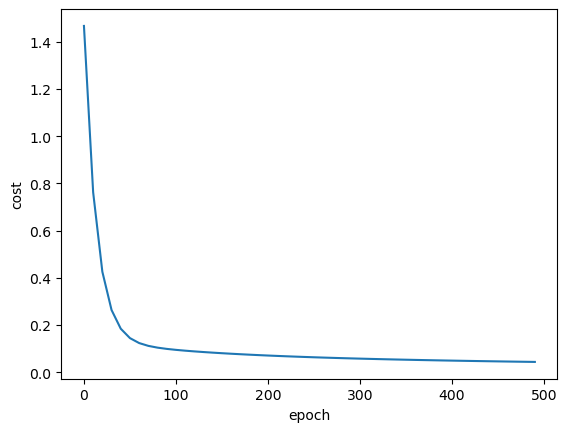

In [21]:
plt.xlabel('epoch')
plt.ylabel('cost')
plt.plot(epoch_list, cost_list)

In [22]:
def batch_gradient_descent(x,y_true, epochs, learning_rate=0.01):
    
    no_of_features=x.shape[1]
    #initialize_w_to_be_1
    w=np.ones(shape=(no_of_features))
    b=0
    total_samples=x.shape[0]
    cost_list=[]
    epoch_list=[]
    for i in range(epochs):#for_each_iterations_use_all_training_example_as_it_is_batch_gradient_descent
        
        y_predicted= np.dot(w, scaled_x.T)+ b
        w_grad= (-3/total_samples)*(x.T.dot(y_true- y_predicted))
        b_grad=(-3/total_samples)*np.sum(y_true- y_predicted)
        
        w= w- learning_rate*w_grad
        b=b- learning_rate*b_grad
        cost=np.mean(np.square(y_true-y_predicted))
        
        #to_record_value_of_cost_and_epoch_at_few_iterations:
        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)
            
    return w, b, cost, cost_list, epoch_list
w, b, cost , cost_list, epoch_list=batch_gradient_descent(scaled_x,scaled_y.reshape(scaled_y.shape[0],),500)
w, b, cost

(array([0.79316942, 0.54669069, 0.0524811 ]),
 -0.40912971454915564,
 0.03272116906812549)

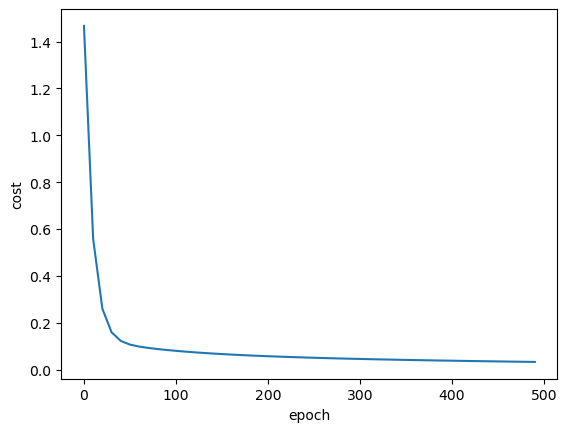

In [23]:
plt.xlabel('epoch')
plt.ylabel('cost')
plt.plot(epoch_list, cost_list)

In [24]:
sx.transform([[2600,3,20]])

/Users/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[0.        , 0.5       , 0.54545455]])

In [25]:
w

array([0.79316942, 0.54669069, 0.0524811 ])

In [26]:
sy.inverse_transform([[1]])#returns_max_value_in_output_as_min_max_scaler_works_in_this_way

array([[810000.]])

In [27]:
sy.inverse_transform([[1,0]])#returns_max_and_min_value_from_output_variable_as_acc-to_min_max_scaler

array([[810000., 550000.]])

In [28]:
sy.inverse_transform([[1,0.5,0]])#here_we_get_an_extrintermediate_value

array([[810000., 680000., 550000.]])

In [30]:
#calling_of_prediction_function
def predict(area, bedrooms, age, w, b):
    scaled_x=sx.transform([[area,bedrooms,age]])[0]
    scaled_price=w[0]*scaled_x[0]+ w[1]*scaled_x[1]+ b
    return sy.inverse_transform([[scaled_price]])[0][0]#0_indexing_two_times_for_2d_array_to_get_a_single_value_as_answer
    pass
predict(2600,3,20,w,b)


/Users/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


514696.0634346916

In [32]:
predict(3000,4,15,w,b)

/Users/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


593379.0728479342

In [34]:
predict(4000,5,8,w,b)

/Users/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


754551.7017723047

In [39]:
import random
random.randint(0,5)

3

In [47]:
#Stochastic_gradient_descent_implementation
def stochastic_gradient_descent(x,y_true, epochs, learning_rate=0.01):
    no_of_features=x.shape[1]
    w=np.ones(shape=(no_of_features))
    b=0
    total_samples=x.shape[0]
    cost_list=[]
    epoch_list=[]
    for i in range(epochs):
        random_index=random.randint(0,total_samples-1)
        sample_x=x[random_index]
        sample_y=y_true[random_index]
        y_predicted=np.dot(w,sample_x.T)+ b
        w_grad=(-2/total_samples)*(sample_x.T.dot(sample_y-y_predicted))
        b_grad=(-2/total_samples)*(sample_y-y_predicted)
        
        w=w-learning_rate*w_grad
        b=b-learning_rate*b_grad
        
        cost=np.square(sample_y-y_predicted)
        
        if i%100==0:
            cost_list.append(cost)
            epoch_list.append(i)
            
    return w, b, cost, cost_list, epoch_list

w_sgd, b_sgd, cost_sgd, cost_list_sgd, epoch_list_sgd=stochastic_gradient_descent(scaled_x,scaled_y.reshape(scaled_y.shape[0]),10000)
w_sgd, b_sgd, cost_sgd
        

(array([ 0.76035306,  0.34169905, -0.18478043]),
 -0.1751239062150904,
 0.011153151191101836)

In [41]:
w, b, cost

(array([0.79316942, 0.54669069, 0.0524811 ]),
 -0.40912971454915564,
 0.03272116906812549)

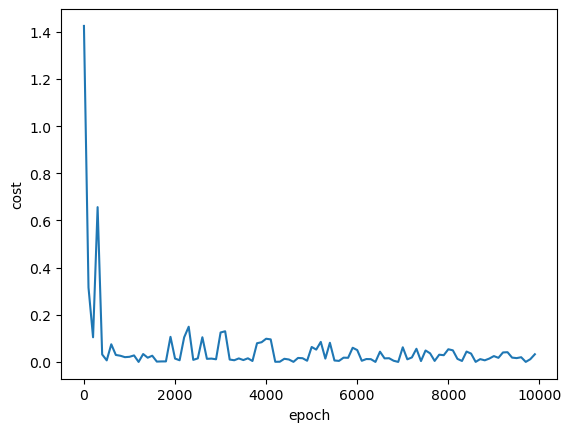

In [42]:
plt.xlabel('epoch')
plt.ylabel('cost')
plt.plot(epoch_list_sgd, cost_list_sgd)

In [48]:
predict(3600,3,30,w_sgd,b_sgd)

/Users/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


680683.1910670045

In [49]:
predict(4000, 5, 8, w_sgd, b_sgd)

/Users/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


763014.9207397057

In [51]:
np.random.permutation(20)

array([12, 13, 10,  7,  1,  2, 14,  8,  6,  0,  9, 15, 19,  4, 18, 11, 17,
       16,  3,  5])

In [54]:
#Implementation_of_mini_batch_gradient_descent
def mini_batch_gradient_descent(x, y_true,epochs=100, batch_size=5, learning_rate=0.01):
    no_of_features=x.shape[1]
    w=np.ones(shape=(no_of_features))
    b=0
    total_samples=x.shape[0]
    if batch_size>total_samples:#in_this_case_mini_batch_becomes_batch_gradient_descent
        batch_size=total_samples
    
    cost_list=[]
    epoch_list=[]
    num_batches=int(total_samples/batch_size)
    
    for i in range(epochs):
        random_indices=np.random.permutation(total_samples)
        x_tmp=x[random_indices]
        y_tmp=y_true[random_indices]
        
        for j in range(0,total_samples,batch_size):
            xj=x_tmp[j:j+batch_size]
            yj=y_tmp[j:j+batch_size]
            y_predicted=np.dot(w,xj.T)+b
            
            w_grad=(-2/len(xj))*(xj.T.dot(yj-y_predicted))
            b_grad=(-2/len(xj))*(np.sum(yj-y_predicted))
            
            w=w-learning_rate*w_grad
            b=b-learning_rate*b_grad
            
            cost=np.mean(np.square(yj-y_predicted))
        
        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)
    return w, b, cost, cost_list, epoch_list
wm, bm, costm, cost_listm, epoch_listm=mini_batch_gradient_descent(scaled_x, scaled_y.reshape(scaled_y.shape[0]),epochs=120,batch_size=3)
wm, bm,costm
    
    
    

(array([0.75934308, 0.65420693, 0.38111112]),
 -0.5780587893725079,
 0.04846913635189825)

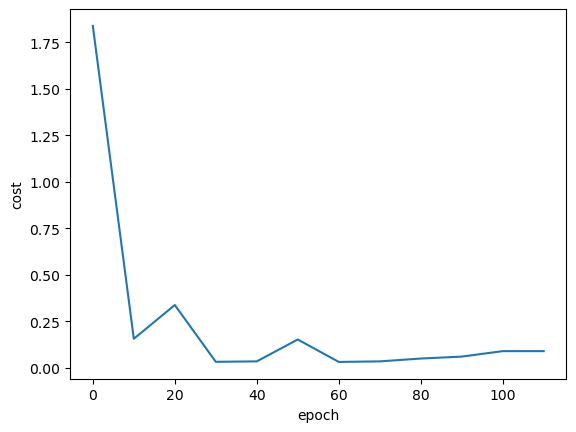

In [55]:
plt.xlabel('epoch')
plt.ylabel('cost')
plt.plot(epoch_listm, cost_listm)

In [56]:
def predict(area, bedrooms, age,wm, bm):
    scaled_x=sx.transform([[area,bedrooms,age]])[0]
    scaled_price=w[0]*scaled_x[0]+w[1]*scaled_x[1]+w[2]*scaled_x[2]+b
    return sy.inverse_transform([[scaled_price]])[0][0]
predict(3600,3,30,wm,bm)

/Users/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


665823.849866407

In [57]:
predict(4000,5,8,wm,bm)

/Users/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


754551.7017723047